# Importando bibliotecas 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


# Carregando o DataFrame e mostrando as informações principais 

In [80]:
df = pd.read_csv('C:/Users/lsvieira2/Documents/data_analyst/Online Sales Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


# Mostrando as 5 primeiras linhas do DataFrame

In [81]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# Verificando se há algum valor nulo no DataFrame

In [82]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

# Estatísticas descritivas do DataFrame


In [83]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


## 1. Categorias de produtos 
- Quais categorias de produtos têm o maior número de unidades vendidas?

In [84]:
categoria_unit = df.groupby('Product Category')['Units Sold'].sum()
categoria_unit_asc = categoria_unit.sort_values(ascending=False)
categoria_unit_df = categoria_unit_asc.reset_index()
categoria_unit_df.columns = ['Categoria dos produtos', 'Unidades vendidas por categoria']
categoria_unit_df.head(6)

,Categoria dos produtos,Unidades vendidas por categoria
0,Clothing,145
1,Books,114
2,Sports,88
3,Electronics,66
4,Home Appliances,59
5,Beauty Products,46


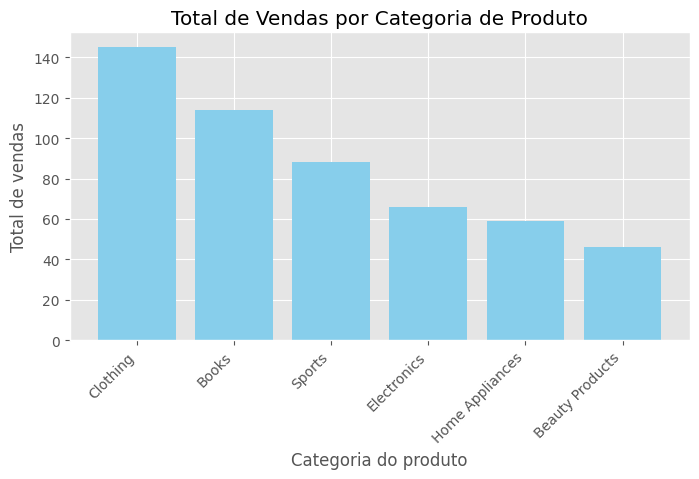

In [85]:
plt.figure(figsize=(8, 4))  
plt.bar(categoria_unit_df['Categoria dos produtos'], categoria_unit_df['Unidades vendidas por categoria'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Categoria de Produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 1.1 Categorias de produtos 

- Qual é a receita total gerada por cada categoria de produto?


In [86]:
categoria_preco = df.groupby('Product Category')['Total Revenue'].sum()
categoria_preco_asc = categoria_preco.sort_values(ascending=False)
categoria_df = categoria_preco_asc.reset_index()
categoria_df.columns = ['Categoria dos produtos', 'Total de vendas']
categoria_df.head(6)

,Categoria dos produtos,Total de vendas
0,Electronics,34982.41
1,Home Appliances,18646.16
2,Sports,14326.52
3,Clothing,8128.93
4,Beauty Products,2621.90
5,Books,1861.93


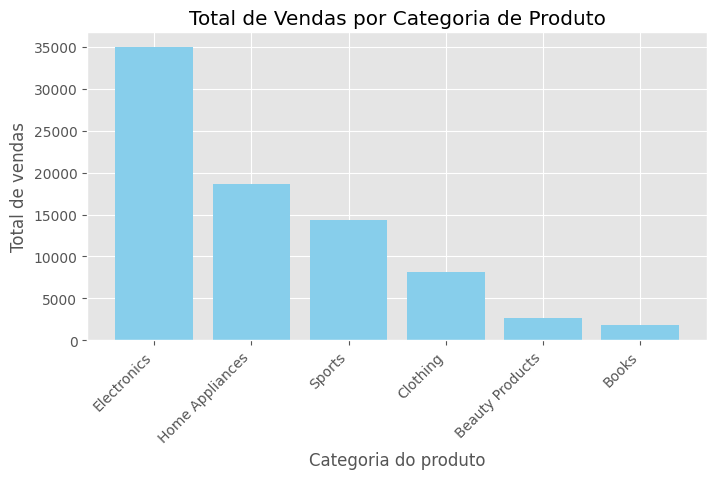

In [87]:
plt.figure(figsize=(8, 4))  
plt.bar(categoria_df['Categoria dos produtos'], categoria_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Categoria de Produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 2. Quais são os produtos mais populares?
- Qual é a receita total gerada por cada produto?

In [88]:
produto_preco = df.groupby('Product Name')['Total Revenue'].sum()
produto_preco_asc = produto_preco.sort_values(ascending=False)
produto_df = produto_preco_asc.reset_index()
produto_df.columns = ['Nome do produto', 'Total de vendas']
produto_10 = produto_df.head(10)
produto_10


,Nome do produto,Total de vendas
0,Canon EOS R5 Camera,3899.99
1,LG OLED TV,2599.98
2,MacBook Pro 16-inch,2499.99
3,Apple MacBook Pro 16-inch,2399.00
4,iPhone 14 Pro,1999.98
5,Peloton Bike,1895.00
6,HP Spectre x360 Laptop,1599.99
7,Roomba i7+,1599.98
8,Garmin Forerunner 945,1599.97
9,Samsung Odyssey G9 Gaming Monitor,1499.99


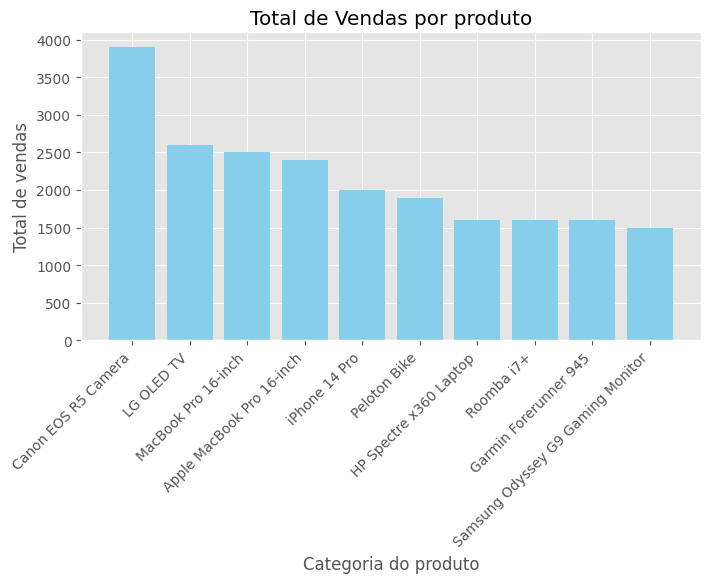

In [89]:
plt.figure(figsize=(8, 4))  
plt.bar(produto_10['Nome do produto'], produto_10['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## 2.1 Quais são os produtos mais populares?
- Quais produtos específicos têm o maior número de unidades vendidas?

In [90]:
produto_unit = df.groupby('Product Name')['Units Sold'].sum()
produto_unit_asc = produto_unit.sort_values(ascending=False)
produto_unit_df = produto_unit_asc.reset_index()
produto_unit_df.columns = ['Nome do produto', 'Unidades vendidas']
produto_unit_10 = produto_unit_df.head(10)
produto_unit_10

,Nome do produto,Unidades vendidas
0,Hanes ComfortSoft T-Shirt,10
1,The Catcher in the Rye by J.D. Salinger,7
2,Yeti Rambler Tumbler,6
3,Gap Essential Crewneck T-Shirt,6
4,Spalding NBA Street Basketball,6
5,Nike Air Force 1,6
6,Forever 21 Graphic Tee,5
7,Under Armour HeatGear T-Shirt,5
8,The Silent Patient by Alex Michaelides,5
9,Calvin Klein Boxer Briefs,5


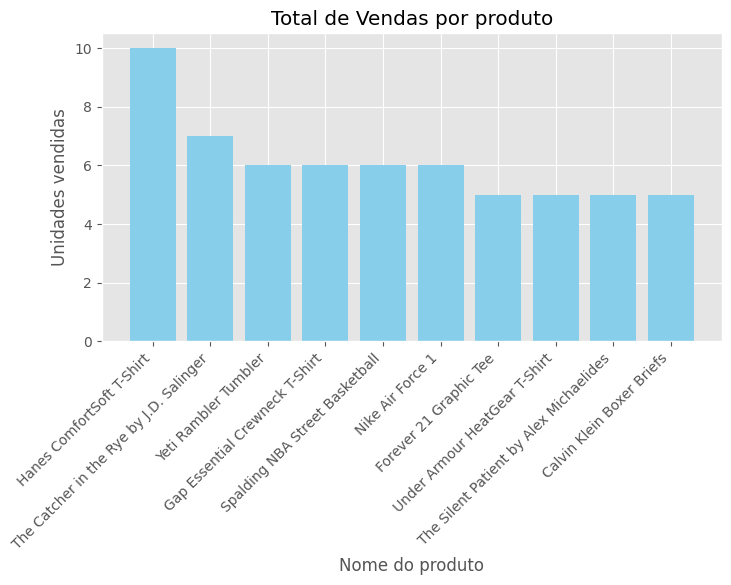

In [91]:
plt.figure(figsize=(8, 4))  
plt.bar(produto_unit_10['Nome do produto'], produto_unit_10['Unidades vendidas'], color='skyblue')  
plt.xlabel('Nome do produto')  
plt.ylabel('Unidades vendidas')  
plt.title('Total de Vendas por produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## Análise por Região
3. **Quais regiões geram mais receita?**
   - Qual é a distribuição das vendas por região?
   - Há alguma região com desempenho notavelmente melhor ou pior?

In [92]:
regiao_vendas = df.groupby('Region')['Total Revenue'].sum()
regiao_vendas_asc = regiao_vendas.sort_values(ascending=False)
regiao_df = regiao_vendas_asc.reset_index()
regiao_df.columns = ['Regiao', 'Total de vendas']
regiao_df.head()

,Regiao,Total de vendas
0,North America,36844.34
1,Asia,22455.45
2,Europe,21268.06


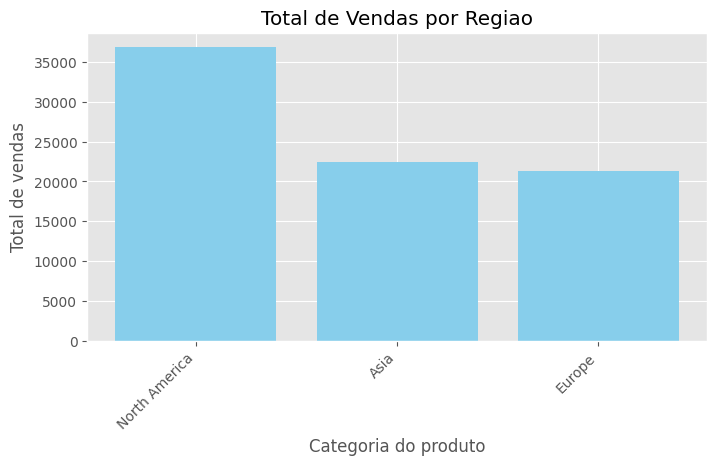

In [93]:
plt.figure(figsize=(8, 4))  
plt.bar(regiao_df['Regiao'], regiao_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Regiao')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

3.1 **Quais regiões geram mais receita?**
   - Há alguma região com desempenho notavelmente melhor ou pior?

In [94]:
melhor_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmax()]
pior_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmin()]
desempenho_extremos = pd.concat([melhor_regiao.to_frame().T, pior_regiao.to_frame().T], ignore_index=True)
desempenho_extremos

,Regiao,Total de vendas
0,North America,36844.34
1,Europe,21268.06


## Tendências de Vendas ao Longo do Tempo
4. **Como as vendas variam ao longo do tempo (diariamente, semanalmente, mensalmente)?**
   - Há picos de vendas em determinadas datas ou períodos?

In [95]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [96]:
vendas_diarias = df.groupby(df['Date'].dt.date)['Total Revenue'].sum()
vendas_diarias

Date
2024-01-01    1999.98
2024-01-02     499.99
2024-01-03     209.97
2024-01-04      63.96
2024-01-05      89.99
               ...   
2024-08-23     159.99
2024-08-24     270.00
2024-08-25      32.97
2024-08-26      55.00
2024-08-27      59.98
Name: Total Revenue, Length: 240, dtype: float64

In [97]:
vendas_semanais = df.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum()
vendas_semanais

Date
2024-01-01/2024-01-07    5513.83
2024-01-08/2024-01-14    4211.83
2024-01-15/2024-01-21    2767.84
2024-01-22/2024-01-28    1064.87
2024-01-29/2024-02-04    1569.81
2024-02-05/2024-02-11    5374.86
2024-02-12/2024-02-18    2361.86
2024-02-19/2024-02-25    1857.84
2024-02-26/2024-03-03    2028.80
2024-03-04/2024-03-10    2899.84
2024-03-11/2024-03-17    3309.86
2024-03-18/2024-03-24    1678.83
2024-03-25/2024-03-31    3560.86
2024-04-01/2024-04-07    2862.87
2024-04-08/2024-04-14    5167.84
2024-04-15/2024-04-21    1168.36
2024-04-22/2024-04-28    1802.65
2024-04-29/2024-05-05    1879.87
2024-05-06/2024-05-12    3107.74
2024-05-13/2024-05-19    2176.59
2024-05-20/2024-05-26    1633.34
2024-05-27/2024-06-02    1306.87
2024-06-03/2024-06-09    1918.86
2024-06-10/2024-06-16    1822.83
2024-06-17/2024-06-23    1984.38
2024-06-24/2024-06-30    1459.53
2024-07-01/2024-07-07    1832.86
2024-07-08/2024-07-14    1004.82
2024-07-15/2024-07-21    1294.89
2024-07-22/2024-07-28    1534.94
2024-

In [98]:
vendas_mensais = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum()
vendas_mensais

Date
2024-01    14548.32
2024-02    10803.37
2024-03    12849.24
2024-04    12451.69
2024-05     8455.49
2024-06     7384.55
2024-07     6797.08
2024-08     7278.11
Freq: M, Name: Total Revenue, dtype: float64

In [99]:
media_diaria = vendas_diarias.mean()
media_diaria

np.float64(335.699375)

In [100]:
desvio_padrao_vendas_diarias = vendas_diarias.std()
desvio_padrao_vendas_diarias

np.float64(485.8044685651321)

In [101]:
picos_vendas = vendas_diarias[vendas_diarias > (media_diaria + 2 * desvio_padrao_vendas_diarias)].reset_index()
picos_vendas_df = picos_vendas.sort_values(by = 'Total Revenue', ascending=False, ignore_index=True)
picos_vendas_df.head(15)

,Date,Total Revenue
0,2024-04-12,3899.99
1,2024-03-26,2599.98
2,2024-01-07,2499.99
3,2024-08-04,2399.00
4,2024-01-01,1999.98
5,2024-02-05,1895.00
6,2024-03-13,1599.99
7,2024-02-07,1599.98
8,2024-05-18,1499.99
9,2024-01-13,1499.98


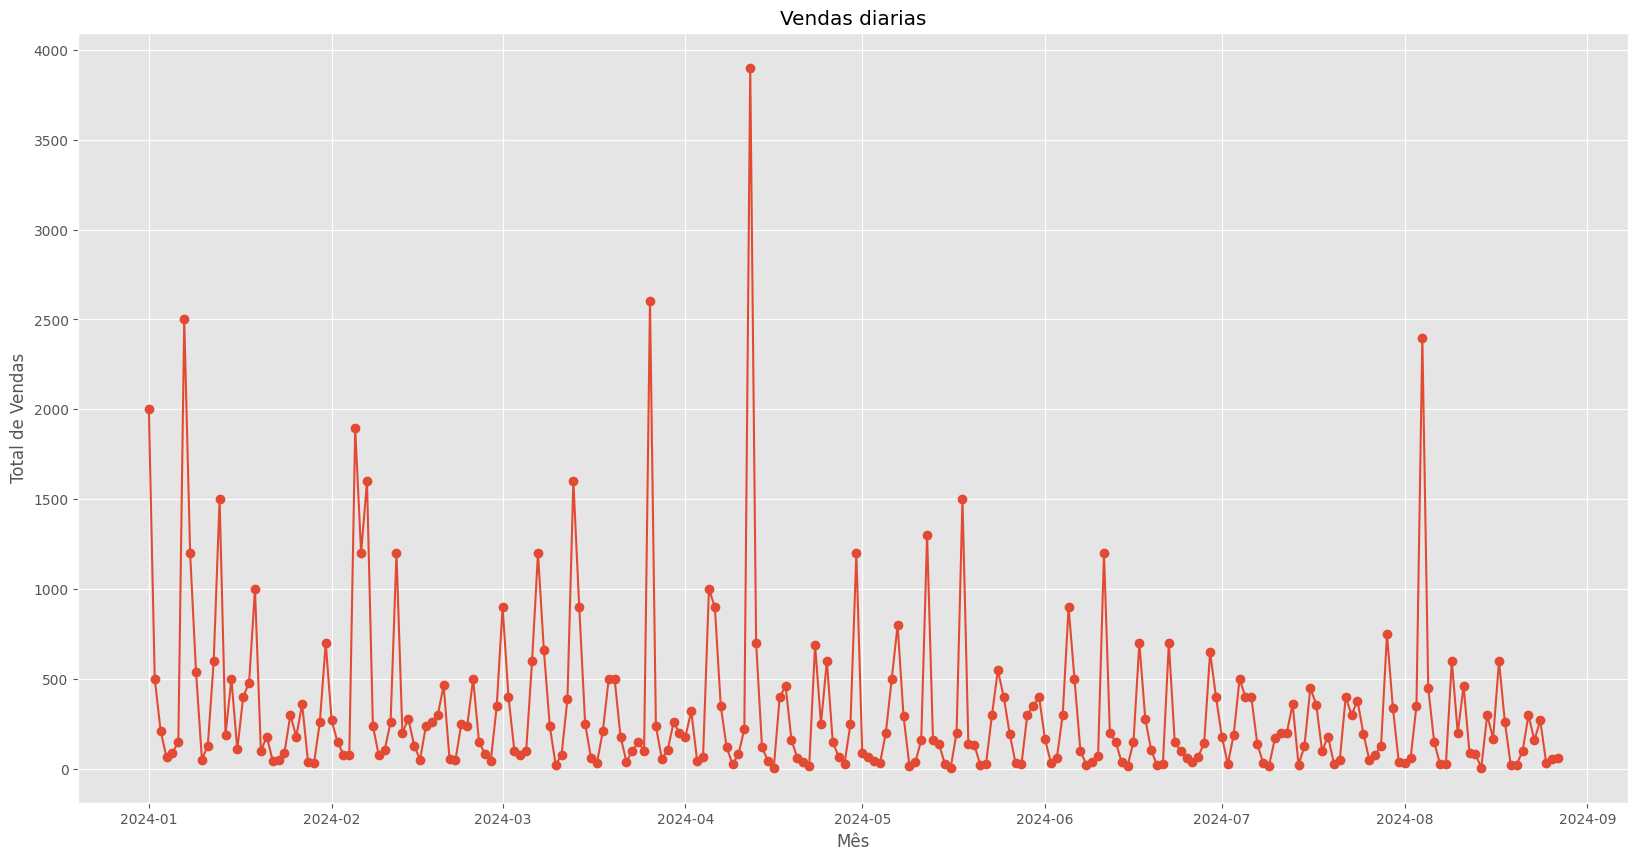

In [102]:
plt.figure(figsize=(20, 10))
vendas_diarias.plot(marker='o')
plt.title('Vendas diarias')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

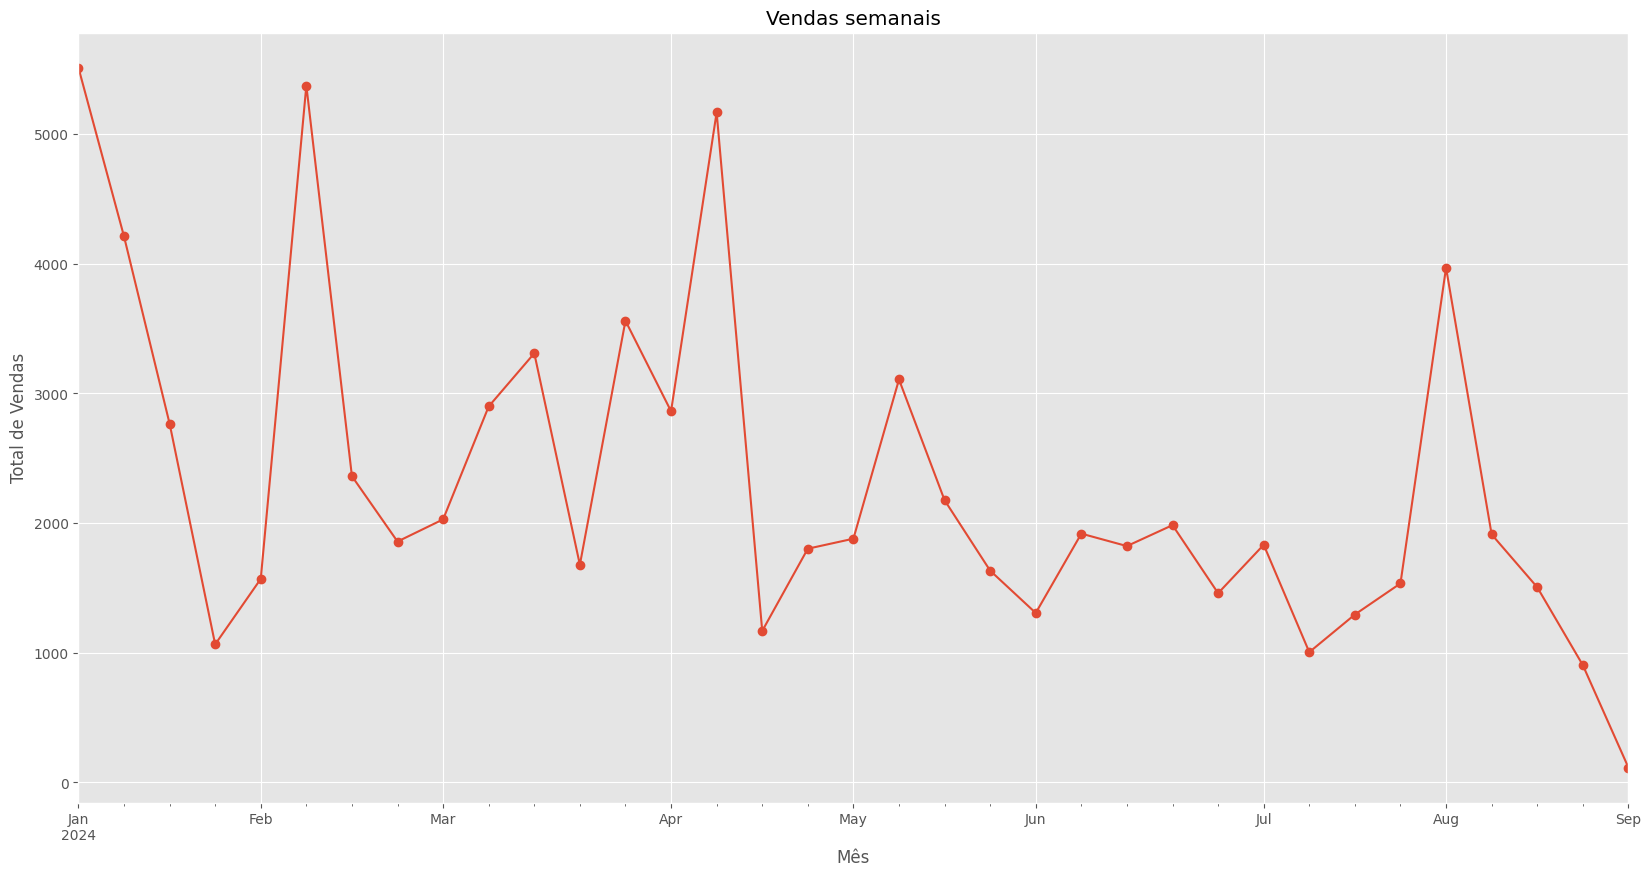

In [103]:
plt.figure(figsize=(20, 10))
vendas_semanais.plot(marker='o')
plt.title('Vendas semanais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

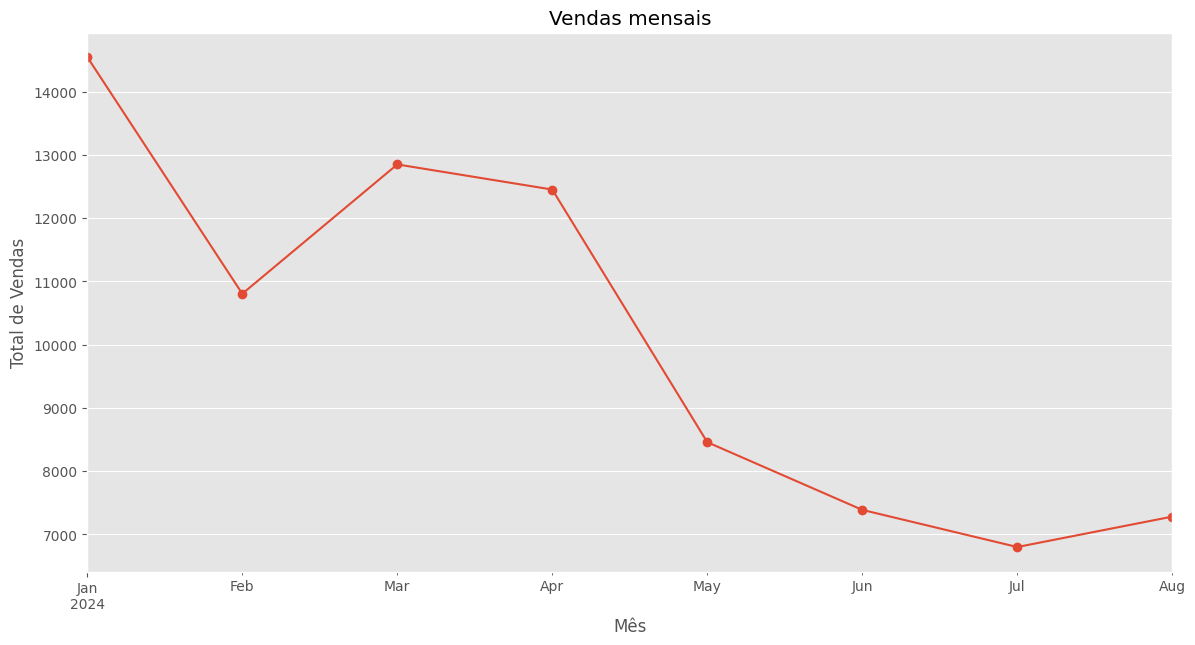

In [104]:
plt.figure(figsize=(14, 7))
vendas_mensais.plot(marker='o')
plt.title('Vendas mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

## Métodos de Pagamento
5. **Qual é a distribuição dos métodos de pagamento utilizados?**
   - Há algum método de pagamento que se destaca em termos de frequência ou valor total?

In [105]:
frequencia_pagamento = df['Payment Method'].value_counts(normalize=True) * 100
frequencia_pagamento_df = frequencia_pagamento.reset_index()
frequencia_pagamento_df.columns = ['Metodo de pagamento', 'Frequencia (%)']
frequencia_pagamento_df

,Metodo de pagamento,Frequencia (%)
0,Credit Card,50.000000
1,PayPal,33.333333
2,Debit Card,16.666667


5.1 **Há algum método de pagamento que se destaca em termos de frequência ou valor total?**

In [106]:
valor_total_metodos_pagamento = df.groupby('Payment Method')['Total Revenue'].sum()
valor_total_metodos_pagamento_percent = (valor_total_metodos_pagamento / valor_total_metodos_pagamento.sum()) * 100
valor_total_metodos_pagamento_df = valor_total_metodos_pagamento_percent.reset_index().sort_values(by = 'Total Revenue', ascending=False, ignore_index=True)
valor_total_metodos_pagamento_df.columns = ['Método de Pagamento', 'Valor Total (%)']

valor_total_metodos_pagamento_df.head()


,Método de Pagamento,Valor Total (%)
0,Credit Card,63.512754
1,PayPal,26.397701
2,Debit Card,10.089546


## 6. Desempenho de vendas por transação:
- Qual é o valor médio de receita por transação?
- Existem transações notavelmente grandes ou pequenas que mereçam atenção?


In [107]:
media_transacao = df['Total Revenue'].mean()
media_transacao

np.float64(335.699375)

In [108]:
desvio_transacao = df['Total Revenue'].std()
desvio_transacao

np.float64(485.8044685651321)

In [109]:
limiar_superior =  media_transacao + 2 * desvio_transacao
limiar_inferior = media_transacao - 2 * desvio_transacao

In [110]:
transacao_grande = df[df['Total Revenue'] > limiar_superior]
transacao_pequena = df[df['Total Revenue'] < limiar_inferior]
transacoes_extremas = pd.concat([transacao_grande])
transacoes_extremas.head(30)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1,1
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card,2024,1,7
12,10013,2024-01-13,Electronics,Samsung Galaxy Tab S8,2,749.99,1499.98,North America,Credit Card,2024,1,13
35,10036,2024-02-05,Sports,Peloton Bike,1,1895.00,1895.00,Asia,Credit Card,2024,2,5
37,10038,2024-02-07,Home Appliances,Roomba i7+,2,799.99,1599.98,Europe,PayPal,2024,2,7
72,10073,2024-03-13,Electronics,HP Spectre x360 Laptop,1,1599.99,1599.99,North America,Credit Card,2024,3,13
85,10086,2024-03-26,Home Appliances,LG OLED TV,2,1299.99,2599.98,Europe,PayPal,2024,3,26
102,10103,2024-04-12,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card,2024,4,12
138,10139,2024-05-18,Electronics,Samsung Odyssey G9 Gaming Monitor,1,1499.99,1499.99,North America,Credit Card,2024,5,18
216,10217,2024-08-04,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card,2024,8,4


## 8. Popularidade de diferentes regiões.
- Explore a popularidade de diferentes categorias de produtos em todas as regiões.


In [111]:
df_america = df[df['Region'] == 'North America']
america_category = df_america.groupby('Product Category')['Total Revenue'].sum().reset_index()
america_asc = america_category.sort_values(by= 'Total Revenue', ascending = False)
america_asc.head()

,Product Category,Total Revenue
1,Electronics,34982.41
0,Books,1861.93


In [112]:
df_asia = df[df['Region'] == 'Asia']
asia_category = df_asia.groupby('Product Category')['Total Revenue'].sum().reset_index()
asia_asc = asia_category.sort_values(by= 'Total Revenue', ascending = False)
asia_asc.head()

,Product Category,Total Revenue
1,Sports,14326.52
0,Clothing,8128.93


In [113]:
df_europe = df[df['Region'] == 'Asia']
europe_category = df_europe.groupby('Product Category')['Total Revenue'].sum().reset_index()
europe_asc = europe_category.sort_values(by= 'Total Revenue', ascending = False)
europe_asc.head()

,Product Category,Total Revenue
1,Sports,14326.52
0,Clothing,8128.93


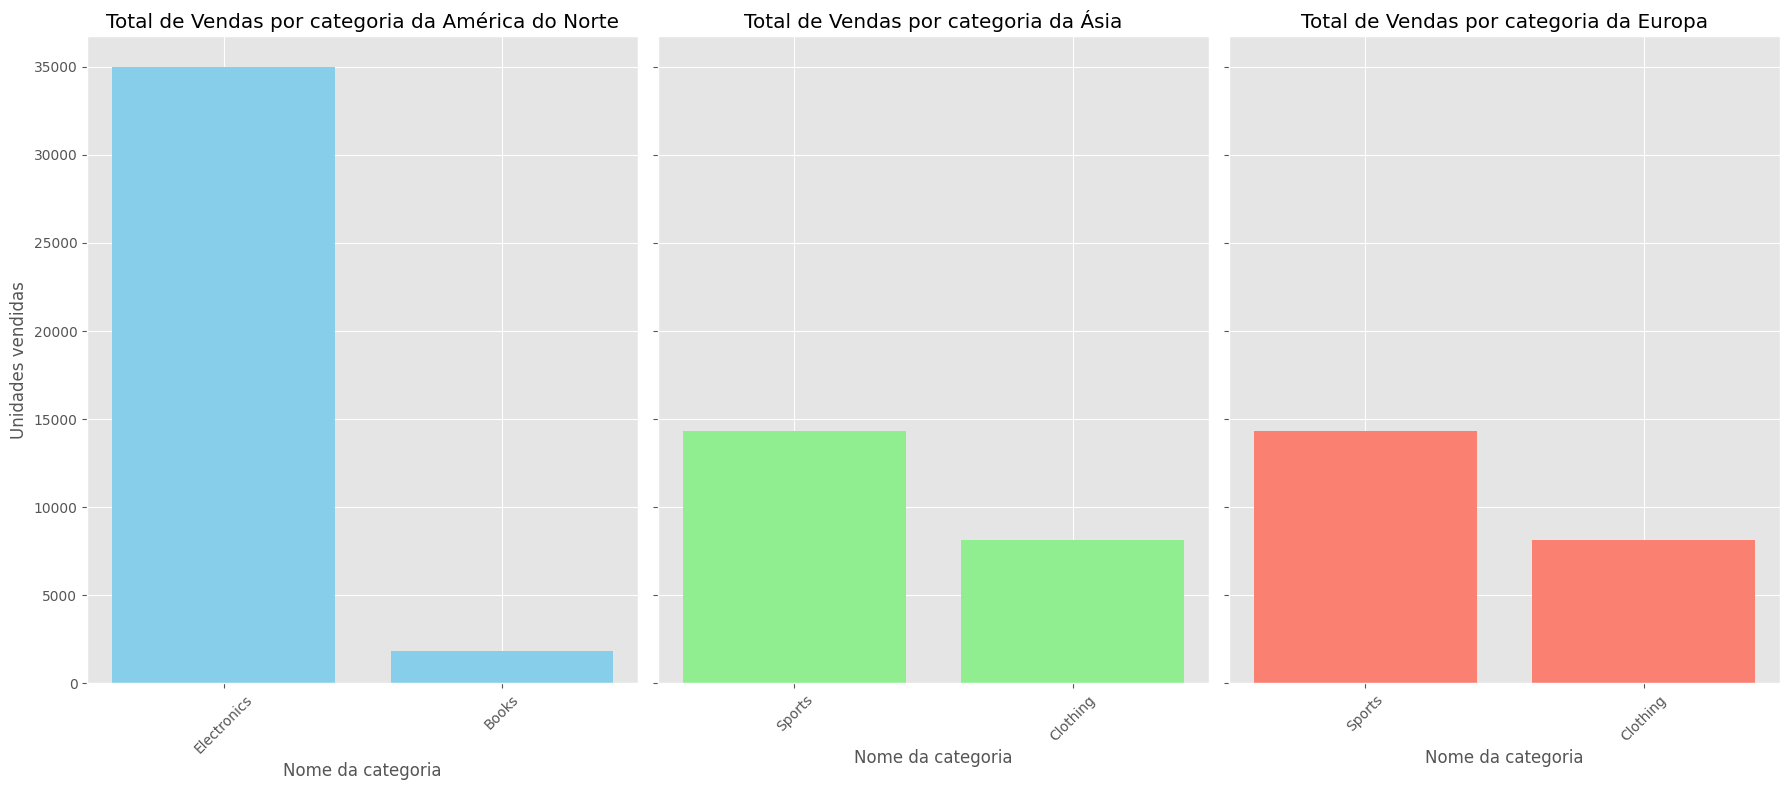

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

axes[0].bar(america_asc['Product Category'], america_asc['Total Revenue'], color='skyblue')
axes[0].set_xlabel('Nome da categoria')
axes[0].set_ylabel('Unidades vendidas')
axes[0].set_title('Total de Vendas por categoria da América do Norte')
axes[0].tick_params(axis='x', rotation=45, labelright=True)

axes[1].bar(asia_asc['Product Category'], asia_asc['Total Revenue'], color='lightgreen')
axes[1].set_xlabel('Nome da categoria')
axes[1].set_title('Total de Vendas por categoria da Ásia')
axes[1].tick_params(axis='x', rotation=45, labelright=True)

axes[2].bar(europe_asc['Product Category'], europe_asc['Total Revenue'], color='salmon')
axes[2].set_xlabel('Nome da categoria')
axes[2].set_title('Total de Vendas por categoria da Europa')
axes[2].tick_params(axis='x', rotation=45, labelright=True)

plt.tight_layout()
plt.show()